# Исследование данных сервиса “Яндекс.Музыка” — сравнение пользователей двух городов

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс Музыки вы сравните поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Данные**
Данные о поведении пользователей вы получите из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Согласно документации к данным:

- userID — идентификатор пользователя;
- Track — название трека;
- artist — имя исполнителя;
- genre — название жанра;
- City — город пользователя;
- time — время начала прослушивания;
- Day — день недели.

**Ход исследования**
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.

## Обзор данных

In [54]:
# импорт библиотеки pandas
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# чтение файла с данными и сохранение в df
# сохраняем датасет в переменную data
try:
    df = pd.read_csv('/datasets/yandex_music_project.csv')
except:
    df = pd.read_csv('datasets/yandex_music_project.csv')
    
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [37]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Исправьте стиль в заголовках столбцов, исключите пропуски. Затем проверьте данные на дубликаты.

1. Переименуем колонки:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

In [38]:
# переименование столбцов
df = df.rename(columns={'  userID': 'user_id', 'Track': 'track', '  City  ': 'city', 'Day': 'day'})
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

2. Изучим пропуски

In [39]:
# подсчёт пропусков
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

Пропуски в данных по-разному влияют на исследование. 

Так, мы не исследуем названия треков `track` и имена артистов `artist`, поэтому пропуски можем заполнить каким-то значением, например "unknown".

А вот жанр - `genre` - один из предметов нашего исследования, их наличие может помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями;
* оценить, насколько они повредят расчётам. 

In [41]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['track', 'artist', 'genre']

for col_name in columns_to_replace:
    df[col_name] = df[col_name].fillna('unknown')

3. Удаление дубликатов

In [42]:
# сначала избавимся от явных дубликатов
print(df.duplicated().sum(), "явных дубликатов найдено")
df = df.drop_duplicates().reset_index(drop=True)
if df.duplicated().sum() == 0: print('Все дубликаты удалены')

3826 явных дубликатов найдено
Все дубликаты удалены


Теперь разберемся с неявными дубликатами в колонке `genre`. Например, название одного и того же жанра может быть записано немного по-разному. Такие ошибки тоже повлияют на результат исследования.

In [43]:
# Просмотр уникальных названий жанров
print(df['genre'].sort_values().unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'alternativepunk' 'ambient' 'americana' 'animated' 'anime' 'arabesk'
 'arabic' 'arena' 'argentinetango' 'art' 'audiobook' 'author' 'avantgarde'
 'axé' 'baile' 'balkan' 'beats' 'bigroom' 'black' 'bluegrass' 'blues'
 'bollywood' 'bossa' 'brazilian' 'breakbeat' 'breaks' 'broadway'
 'cantautori' 'cantopop' 'canzone' 'caribbean' 'caucasian' 'celtic'
 'chamber' 'chanson' 'children' 'chill' 'chinese' 'choral' 'christian'
 'christmas' 'classical' 'classicmetal' 'club' 'colombian' 'comedy'
 'conjazz' 'contemporary' 'country' 'cuban' 'dance' 'dancehall' 'dancepop'
 'dark' 'death' 'deep' 'deutschrock' 'deutschspr' 'dirty' 'disco' 'dnb'
 'documentary' 'downbeat' 'downtempo' 'drum' 'dub' 'dubstep' 'eastern'
 'easy' 'electronic' 'electropop' 'emo' 'entehno' 'epicmetal' 'estrada'
 'ethnic' 'eurofolk' 'european' 'experimental' 'extrememetal' 'fado'
 'fairytail' 'film' 'fitness' 'flamenco' 'folk' 'folklore' 'folkmetal'
 'folkrock' 

Замечены следующие варианты дубликатов:
- для жанра **hiphop**: *hip*, *hop*, *hip-hop*;
- для жанра **electronic**: *электроника*.

Устраним такие дубликаты.

In [44]:
def clear_duplicates (df, name, duplicates):
    
    df['genre'] = df['genre'].replace(duplicates, name)
    return df
    

In [45]:
# Устранение неявных дубликатов
duplicates = ['hip', 'hop', 'hip-hop'] # список неправильных названий
name = 'hiphop' # правильное название
df = clear_duplicates(df, 'hiphop', ['hip', 'hop', 'hip-hop'])
df = clear_duplicates(df, 'electronic', ['электроника'])

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Вы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения вы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез
### Сравнение поведения пользователей двух столиц
Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга.
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


In [47]:
# Подсчёт прослушиваний в каждом городе
grouped_plays_by_city = df.groupby('city')['track'].count()
grouped_plays_by_city

city
Moscow              42741
Saint-Petersburg    18512
Name: track, dtype: int64

In [48]:
# Подсчёт прослушиваний в каждый из трёх дней
plays_all_days = df.groupby('day')['track'].count()
plays_all_days

day
Friday       21840
Monday       21354
Wednesday    18059
Name: track, dtype: int64

В общем виде пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

In [49]:
def number_tracks(day, city):
    
    # Функция для подсчёта прослушиваний для конкретного города и дня.\
    
    track_list = df[(df['day'] == day) & (df['city'] == city)]
    track_list_count = track_list['user_id'].count()
    return track_list_count

In [73]:
# Таблица с результатами
data = [['Moscow', number_tracks('Monday', 'Moscow'), number_tracks('Wednesday', 'Moscow'), 
        number_tracks('Friday', 'Moscow')],
        ['Saint-Petersburg', number_tracks('Monday', 'Saint-Petersburg'), number_tracks('Wednesday', 'Saint-Petersburg'),
        number_tracks('Friday', 'Saint-Petersburg')]]
columns = ['city', 'monday', 'wednesday', 'friday']

plays_by_days = pd.DataFrame(data=data, columns=columns)
plays_by_days = plays_by_days.set_index('city')
plays_by_days = plays_by_days.T
plays_by_days

city,Moscow,Saint-Petersburg
monday,15740,5614
wednesday,11056,7003
friday,15945,5895


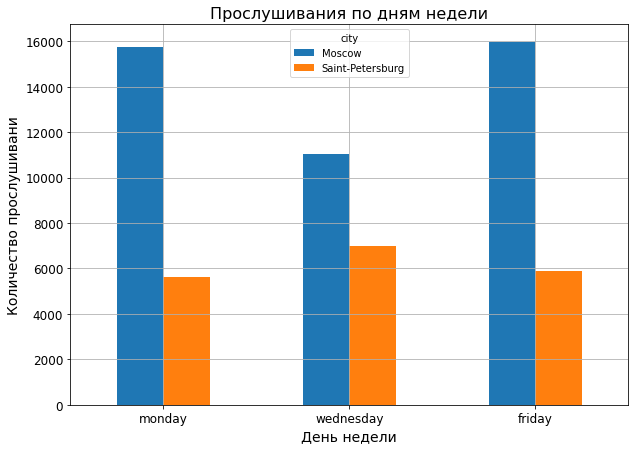

In [86]:
plays_visual = (plays_by_days
                .plot(grid=True,
                      figsize=(10, 7), 
                      fontsize=12,
                      kind = 'bar'
                     ) 
               )
plt.title(label='Прослушивания по дням недели', fontsize=16)
plays_visual.set_xlabel('День недели', fontsize=14)
plays_visual.set_ylabel('Количество прослушивани', fontsize=14)
plt.xticks(rotation=0)
plt.show()

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели
Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

In [87]:
# получение таблицы moscow_general из тех строк таблицы df, 
# для которых значение в столбце 'city' равно 'Moscow'
moscow_general = df[df['city'] == 'Moscow']

# для которых значение в столбце 'city' равно 'Saint-Petersburg'
spb_general = df[df['city'] == 'Saint-Petersburg']

In [126]:
def genre_weekday(df, day, time1, time2):
    
    # возвращает информацию о самых популярных жанрах в указанный день в заданное время
    
    genre_df = df[(df['day'] == day) & (df['time'] < time2) & (df['time'] > time1)]
    genre_df_grouped = genre_df.groupby('genre')['genre'].count()
    genre_df_sorted = genre_df_grouped.sort_values(ascending=False)
    return genre_df_sorted[:10]

Cравните результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [187]:
#data for Moscow at mondays morning
monday_genres1 = genre_weekday(moscow_general, 'Monday', '07:00', '11:00')
monday_genres1 = pd.DataFrame(monday_genres1)
monday_genres1.columns = ['Москва']

#data for SPb at mondays morning
monday_genres2 = genre_weekday(spb_general, 'Monday', '07:00', '11:00')
monday_genres2 = pd.DataFrame(monday_genres2)
monday_genres2.columns = ['СПб']

# resulting table
monday = monday_genres1.merge(monday_genres2, left_index=True, right_index=True, how='outer').fillna(0)
monday = monday.astype(int)
print("Monday's morning genre comparison")
monday.sort_values(by='Москва', ascending=False).style.background_gradient('coolwarm')

Monday's morning genre comparison


,Москва,СПб
genre,,
pop,781,218
dance,549,182
electronic,480,147
rock,474,162
hiphop,286,80
ruspop,186,64
world,181,0
rusrap,175,55
alternative,164,58


In [189]:
#data for Moscow at fridays night
friday_genres1 = genre_weekday(moscow_general, 'Friday', '17:00', '23:00')
friday_genres1 = pd.DataFrame(friday_genres1)
friday_genres1.columns = ['Москва']

#data for SPb at fridays evening
friday_genres2 = genre_weekday(spb_general, 'Friday', '17:00', '23:00')
friday_genres2 = pd.DataFrame(friday_genres2)
friday_genres2.columns = ['СПб']

# resulting table
friday = friday_genres1.merge(friday_genres2, left_index=True, right_index=True, how='outer').fillna(0)
friday = friday.astype(int)
print("Friday's evening genre comparison")
friday.sort_values(by='Москва', ascending=False).style.background_gradient('coolwarm')

Friday's evening genre comparison


,Москва,СПб
genre,,
pop,713,256
rock,517,216
dance,495,210
electronic,482,216
hiphop,273,97
world,208,54
ruspop,170,0
alternative,163,63
classical,163,60


**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные данные о жанрах (данные не были удалены, т.к. в данном учебном проекте необходимо было исследовать как влияют на результат данные пропуски).

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

In [190]:
# соберем данные по прослушиваемым жанрам в Москве и СПб
# Москва
moscow_genres = moscow_general.groupby('genre')['genre'].count().sort_values(ascending=False)[:10]
moscow_genres = pd.DataFrame(moscow_genres)
moscow_genres.columns = ['Москва']
moscow_genres

# СПб
spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending=False)[:10]
spb_genres = pd.DataFrame(spb_genres)
spb_genres.columns = ['СПб']
spb_genres

# resulting table
genres = moscow_genres.merge(spb_genres, left_index=True, right_index=True, how='outer').fillna(0)
genres = genres.astype(int)
print("Сравнение жанровых предпочтений в Москве и СПб")
genres.sort_values(by='Москва', ascending=False).style.background_gradient('coolwarm')

Сравнение жанровых предпочтений в Москве и СПб


,Москва,СПб
genre,,
pop,5892,2431
dance,4435,1932
rock,3965,1879
electronic,3786,1737
hiphop,2096,960
classical,1616,646
world,1432,515
alternative,1379,649
ruspop,1372,538


**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования
Были проверены три гипотезы и установлено:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. **Первая гипотеза полностью подтвердилась.**

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам. **Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.**

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские. **Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.**

### Примечания
*В данном учебном проекте проверка гипотез не является проверкой статистических гипотез: датасет не располагает данными для статистического анализа. Здесь исследование выполнено подсчетом и сортировкой данных и делать выводы можно только касательно предоставленного датасета.*

*Пропущенные значения в столбце 'genre' занимают существенную долю в данных и угрожают достоверности исследования. В рамках задания эти данные не были удалены, т.к. нужно было убедиться, что они повлияют на результат. Считаю, строки с неуказанным жанрами стоило удалить.*